5.- Gráficas de rendimiento

In [ ]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import time
import random

# Implementación de Merge Sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    L = arr[:mid]
    R = arr[mid:]
    L = merge_sort(L)
    R = merge_sort(R)
    return merge(L, R)

def merge(L, R):
    sorted_list = []
    i = j = 0
    while i < len(L) and j < len(R):
        if L[i] < R[j]:
            sorted_list.append(L[i])
            i += 1
        else:
            sorted_list.append(R[j])
            j += 1
    sorted_list.extend(L[i:])
    sorted_list.extend(R[j:])
    return sorted_list


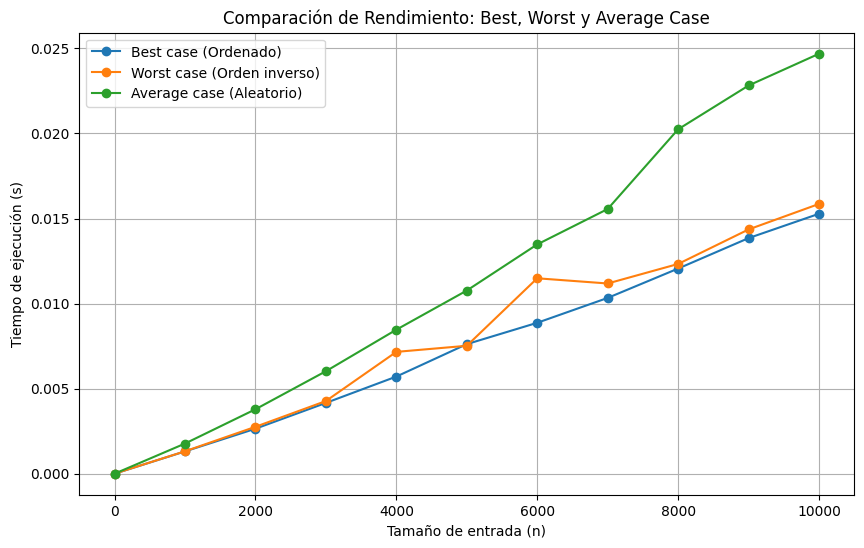

In [4]:
# Best case, Worst case y Average case
def measure_time(arr):
    start_time = time.time()
    merge_sort(arr)
    end_time = time.time()
    return end_time - start_time

# Función para generar los casos
def generate_cases(size):
    best_case = list(range(size))  # Lista ordenada (best case)
    worst_case = list(range(size, 0, -1))  # Lista en orden inverso (worst casr)
    average_case = random.sample(range(size), size)  # Lista aleatoria (average case)
    return best_case, worst_case, average_case

# Función principal para ejecutar simulación
def run_simulation():
    sizes = range(0, 10001, 1000)  # Tamaños de entrada de 0 a 10,000 (incrementos de 1,000)
    best_case_times = []
    worst_case_times = []
    average_case_times = []

    for size in sizes:
        best_case, worst_case, average_case = generate_cases(size)

        # Medir tiempos de cada caso
        best_time = measure_time(best_case)
        worst_time = measure_time(worst_case)
        average_time = measure_time(average_case)

        # Guardar los tiempos
        best_case_times.append(best_time)
        worst_case_times.append(worst_time)
        average_case_times.append(average_time)

    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, best_case_times, marker='o', linestyle='-', label="Best case (Ordenado)")
    plt.plot(sizes, worst_case_times, marker='o', linestyle='-', label="Worst case (Orden inverso)")
    plt.plot(sizes, average_case_times, marker='o', linestyle='-', label="Average case (Aleatorio)")

    plt.xlabel("Tamaño de entrada (n)")
    plt.ylabel("Tiempo de ejecución (s)")
    plt.title("Comparación de Rendimiento: Best, Worst y Average Case")
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutar la simulación
run_simulation()